$$\require{mhchem}$$

# Python/latex practice (2 pts)


## Review the materials we discussed in class on [Wednesday](https://nbviewer.jupyter.org/github/zulissi/f18-06625/blob/master/rxns-book/introduction.ipynb?flush_cache=True).  Look over  scipy.optimize,  scipy.minimize, and np.array modules.  Post at least one question on piazza about the concepts/examples/tutorials that you find confusing.

## The Fibonacci sequence is defined such that each number is the sum of the two previous numbers in the sequence, starting with [1, 1, 2, 3, 5...]. Generate the first 15 elements in the sequence in Python, with the final result as a [list](https://www.tutorialspoint.com/python/python_lists.htm).

In [40]:
fib_sequence = [1, 1]
for i in range(13):
    fib_sequence += [sum(fib_sequence[-2:])]
    
print(fib_sequence)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]


### Bonus (1pt) write a fibonacci generator as a recursive function

## Type-set 5 latex equations.  Choose the 5 most complicated equations you have seen so far in your other classes (or from your undergrad courses) and typeset them here.

# Problem 1:  Reaction extent (5 pt)

## Problem 1A
Ammonia has been proposed as a chemical to store hydrogen for a hydrogen fuel cell due its favorable volumetric hydrogen density. Write down the stoichiometric vector for the thermal decomposition of ammonia to nitrogen and hydrogen.

$\ce{2NH3 -> N2 + 3H2}$

## Problem 1B
Suppose that we know the initial gas concentration of ammonia in a tank is 100 mol/L, and the fractional reaction extent proceeds as $\Xi=(1-e^{-3t^2})$ where $t$ is the time in seconds.  Plot the concentration of ammonia, nitrogen, and hydrogen as a function of time over the first 2 seconds.  Label the plot with a legend to indicate the species.  

From class, we know that
\begin{equation}
C_J = C_{J,0} + \alpha_J \xi
\end{equation}
So how do we find $\xi$? We use the other equation:
\begin{equation}
\Xi = \xi / \xi_{max}
\end{equation}
and rearrange it to:
\begin{equation}
\xi = \Xi \cdot\xi_{max}
\end{equation}
So how do we find $\xi_{max}$? Use:
\begin{equation}
\xi_{max} = -\frac{C_{J,0}}{\alpha_J}
\end{equation}
Let's put it all together:
\begin{equation}
C_J = C_{J,0} + \alpha_J \Xi \biggl(-\frac{C_{J,0}}{\alpha_J}\biggr)
\end{equation}
We can generalize this to:
\begin{equation}
C_i = C_{i,0} + \alpha_i \Xi \biggl(-\frac{C_{J,0}}{\alpha_J}\biggr)
\end{equation}
where i is any species and J is the limiting reactant

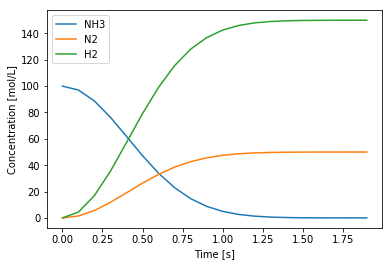

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# The stoichiometric vector for thermal decomposition of ammonia
alpha = np.array([-2, 1, 3])
# The initial concentrations of ammonia, nitrogen, and hydrogen (mol/L)
C0 = [100, 0, 0]

def X(t):
    ''' Function to calculate the extent of reaction given time, t '''
    return (1-np.exp(-3*t**2))

def C(t):
    ''' Function to calculate the vector of species concentrations given time, t '''
    return C0 + X(t)*alpha*(C0[0]/-alpha[0])

Csave = []
Xsave = []
trange = np.arange(0, 2, 0.1)
for t in trange:
    Xsave.append(X(t))
    Csave.append(C(t))

fig, ax1 = plt.subplots()
ax1.plot(trange, Csave)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Concentration [mol/L]')
ax1.legend(labels=['NH3', 'N2', 'H2'])
plt.show()

## Problem 1C
The operator is worried that if the reaction continues to full extent the increase in the number of moles will drive the pressure too high.  Calculate the time it will take to achieve a 50% higher pressure in the reactor (assuming ideal gas) due to the increase in the number of moles, using fsolve.

In [42]:
from scipy.optimize import fsolve

def Nmol(t):
    '''
    This function calculates the total number of moles in the system as a function of time
    '''
    return np.sum(C(t))

def objective(t):
    '''
    This is our objective function; we want to find when the total number of moles
    in the system reaches 150
    '''
    return Nmol(t) - 150

t50, = fsolve(objective, 0.5)
print('50% increase in pressure at {0:.2f}s'.format(t50))

50% increase in pressure at 0.48s


# Problem 2:  Stoichiometry of reaction systems (3 pt)

Consider the following set of chemical reactions:

\begin{equation*}
\ce{H2 + Br2 <=> 2HBr}\\
\ce{Br2 <=> 2Br}\\
\ce{Br+H2 <=> HBr+H}\\
\ce{H+Br2 <=> HBr+Br}\\
\ce{H+HBr <=> H2+Br}\\
\ce{2Br <=> Br2}
\end{equation*}



## Determine the stoichiometric matrix $\nu$, the species list $A$ for this reaction system (in text)

A = [H, Br, H2, Br2, HBr]

In [43]:
v = [[0, 0, -1, -1, 2],
    [0, 2, 0, -1, 0],
    [1, -1, -1, 0, 1],
    [-1, 1, 0, -1, 1],
    [-1, 1, 1, 0, -1],
    [0, -2, 0, 1, 0]]

print(v)

[[0, 0, -1, -1, 2], [0, 2, 0, -1, 0], [1, -1, -1, 0, 1], [-1, 1, 0, -1, 1], [-1, 1, 1, 0, -1], [0, -2, 0, 1, 0]]


## Determine the vector of molecular weights $MW$ and verify that all of the equations you have written obey mass balance

In [44]:
element_MW = [1, 79]
species_to_element = [[1,0],[0,1],[2,0],[0,2],[1,1]]

balance = np.matmul(np.matmul(v,species_to_element),element_MW)
print(balance)

[0 0 0 0 0 0]


## Determine the rank of the matrix using numpy or scipy. How many reactions are linearly independent?

In [45]:
from numpy.linalg import matrix_rank

print('There are %d linearly independent reactions'%(matrix_rank(v)))

There are 3 linearly independent reactions


## Now that you have found the number of independent reactions $n_i$, which $n_i$ of the original set of six reactions can be chosen as an independent set? Try guessing some set of $n_i$ reactions and determine the rank of the new stoichiometric matrix. Stop when you have determined successfully one or more sets of $n_i$ independent reactions.

There're 10 sets of independent sets:
The 1st independent set: rxn 1, 2, and 3.
The 2nd independent set: rxn 1, 2, and 4.
The 3rd independent set: rxn 2, 3, and 4.
The 4th independent set: rxn 1, 2, and 5.
The 5th independent set: rxn 2, 4, and 5.
The 6th independent set: rxn 1, 3, and 6.
The 7th independent set: rxn 1, 4, and 6.
The 8th independent set: rxn 3, 4, and 6.
The 9th independent set: rxn 1, 5, and 6.
The 10th independent set: rxn 4, 5, and 6.

They can be determined by selecting a subset of the matrix (3 by 5) that has the rank of 3. 